In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [95]:
data = pd.read_csv("HepatitisCdata.csv")
data["Sex"].replace({"m" : 1, "f" :0},inplace = True)
data["Category"].replace({"0=Blood Donor" : 0, "0s=suspect Blood Donor" :1, "1=Hepatitis":2, "2=Fibrosis":3, "3=Cirrhosis":4},inplace = True)
#data["ALB"].replace({"NA" : 0},inplace = True)
#data["ALP"].replace({"NA" : 0},inplace = True)
#data["ALT"].replace({"NA" : 0},inplace = True)
#data["AST"].replace({"NA" : 0},inplace = True)
#data["BIL"].replace({"NA" : 0},inplace = True)
#data["CHE"].replace({"NA" : 0},inplace = True)
#data["CHOL"].replace({"NA" : 0},inplace = True)
#data["CREA"].replace({"NA" : 0},inplace = True)
#data["GGT"].replace({"NA" : 0},inplace = True)
#data["PROT"].replace({"NA" : 0},inplace = True)
data.fillna(0)
data.replace(np.nan, 0, inplace = True)
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,0,33.0,0.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [104]:
data['ALB'] = data['ALB'].astype('Float32')
data['ALP'] = data['ALT'].astype('Float32')
data['AST'] = data['AST'].astype('Float32')
data['BIL'] = data['BIL'].astype('Float32')
data['CHE'] = data['CHE'].astype('Float32')
data['CHOL'] = data['CHOL'].astype('Float32')
data['CREA'] = data['CREA'].astype('Float32')
data['GGT'] = data['GGT'].astype('Float32')
data['PROT'] = data['PROT'].astype('Float32')

Text(0.5, 1.0, 'Correlation matrix')

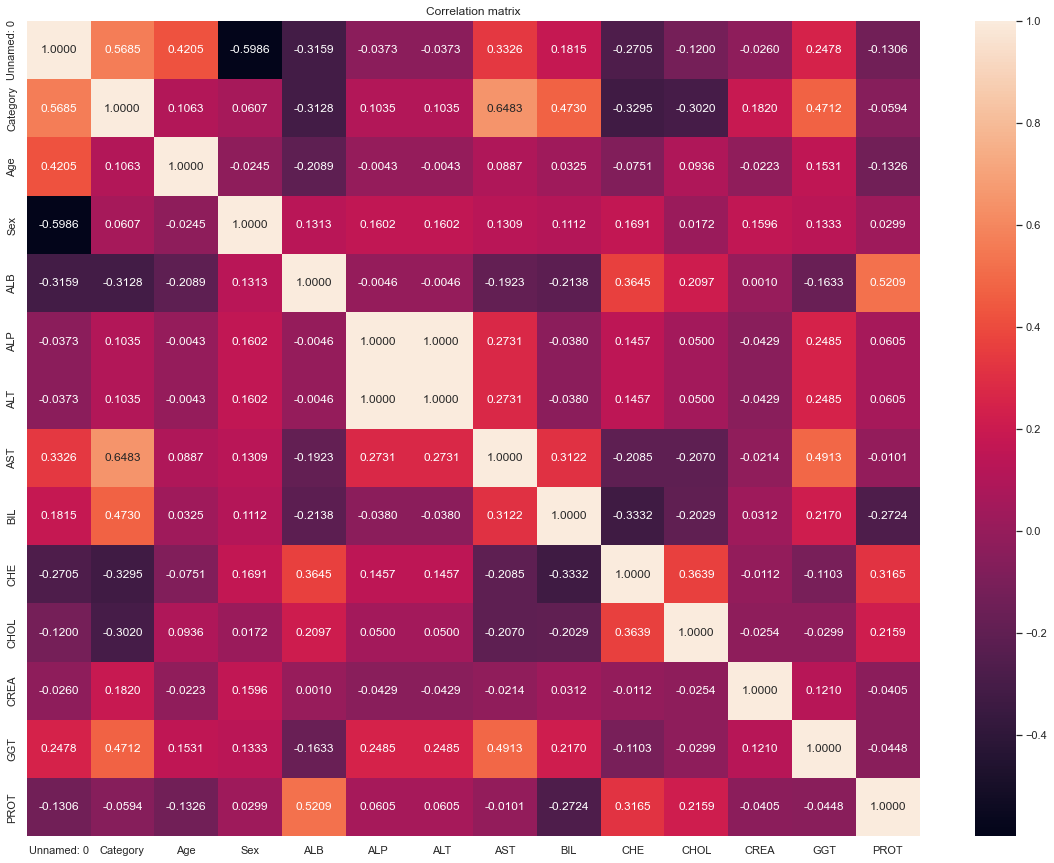

In [105]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr() , annot =True , fmt ="0.4f")
ax.set_title("Correlation matrix")

In [106]:
data.shape

(615, 14)

In [107]:
data.isnull()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
from sklearn.model_selection import train_test_split

inp_var = ["Age","Sex","ALB","ALP","ALT","AST","BIL","CHE","CHOL","CREA","GGT","PROT"]
target_var = ['Category']


X = data[inp_var].values
y = data[target_var].values
test_split_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_split_size, random_state =42)

In [109]:
trainval = (1.0*len(X_train))/(1.0* len(data.index))
testval = (1.0*len(X_test))/(1.0* len(data.index))

print("training_set_value {0:.2f}%".format(trainval*100))
print("testing_set_value {0:.2f}%".format(testval*100))

training_set_value 69.92%
testing_set_value 30.08%


In [110]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression( C= 0.7 , random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_predict = lr_model.predict(X_test)

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,lr_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,lr_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,lr_predict,labels =[1,0]))

Accuracy : 86.49
Confusion Matrix
[[  1   1]
 [  0 151]]
Classification Report
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           0       0.91      0.99      0.95       153

   micro avg       0.90      0.97      0.94       156
   macro avg       0.62      0.66      0.64       156
weighted avg       0.90      0.97      0.93       156



In [111]:
#Support Vector Classification

from sklearn.svm import SVC

svm_model = SVC(kernel = "linear" ,C=1, random_state = 1)
svm_model.fit(X_train,y_train.ravel())
svm_predict = svm_model.predict(X_test)
svm_prediction = svm_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,svm_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,svm_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,svm_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,svm_predict,labels =[1,0]))


Accuracy_of_trained_data : 0.97
Accuracy : 84.86
Confusion Matrix
[[  1   1]
 [  0 151]]
Classification Report
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           0       0.89      0.99      0.94       153

   micro avg       0.89      0.97      0.93       156
   macro avg       0.70      0.66      0.67       156
weighted avg       0.89      0.97      0.93       156



In [112]:
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier(random_state = 1)
dt_model.fit(X_train,y_train.ravel())
dt_model_predict = dt_model.predict(X_test)
training_set_prediction=dt_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,dt_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,dt_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,dt_model_predict,labels =[1,0]))


Accuracy_of_trained_data : 1.00
Accuracy : 85.95
Confusion Matrix
[[  1   1]
 [  1 147]]
Classification Report
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           0       0.94      0.96      0.95       153

   micro avg       0.94      0.95      0.94       156
   macro avg       0.72      0.65      0.68       156
weighted avg       0.93      0.95      0.94       156



In [113]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10, criterion ="entropy", random_state=1)
rf_model.fit(X_train,y_train.ravel())
rf_model_predict = rf_model.predict(X_test)
training_set_prediction=rf_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,rf_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,rf_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,rf_model_predict,labels =[1,0]))


Accuracy_of_trained_data : 0.99
Accuracy : 87.03
Confusion Matrix
[[  0   3]
 [  0 153]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           0       0.89      1.00      0.94       153

   micro avg       0.89      0.98      0.93       156
   macro avg       0.45      0.50      0.47       156
weighted avg       0.88      0.98      0.93       156



In [114]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski' ,p=1)
kn_model.fit(X_train,y_train.ravel())
kn_model_prediction = kn_model.predict(X_test)
training_set_prediction_Accuracy = kn_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction_Accuracy)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,kn_model_prediction)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,kn_model_prediction,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,kn_model_prediction,labels =[1,0]))

Accuracy_of_trained_data : 0.93
Accuracy : 87.03
Confusion Matrix
[[  0   2]
 [  0 153]]
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           0       0.87      1.00      0.93       153

   micro avg       0.87      0.98      0.92       156
   macro avg       0.44      0.50      0.47       156
weighted avg       0.86      0.98      0.91       156

